In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

%matplotlib inline

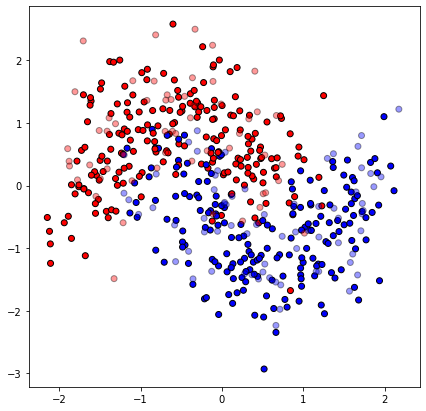

In [2]:
# make moon dataset
dfmoon = make_moons(noise=0.3, random_state=0, n_samples=500)
X, y = dfmoon
X = StandardScaler().fit_transform(X)
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

cm = ListedColormap(['#FF0000', '#0000FF']) 

# Plot the training points
plt.figure(figsize=(7,7))
# red for y=0, blue for y=1
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, edgecolors='k', alpha=0.4)

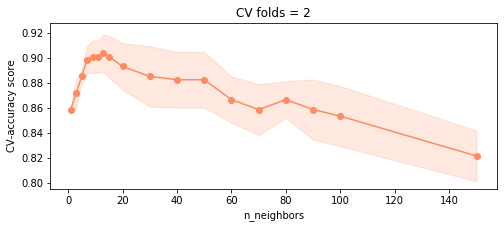

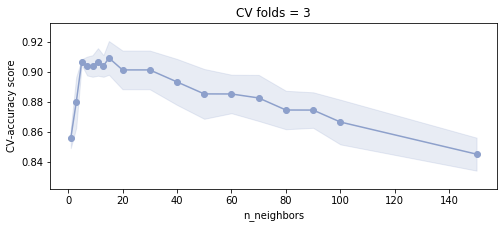

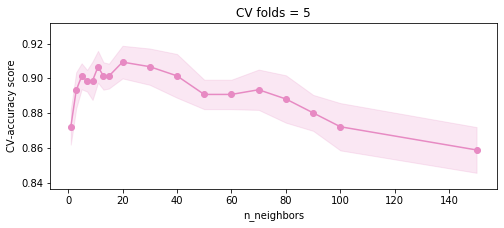

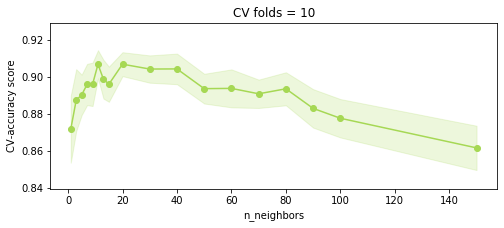

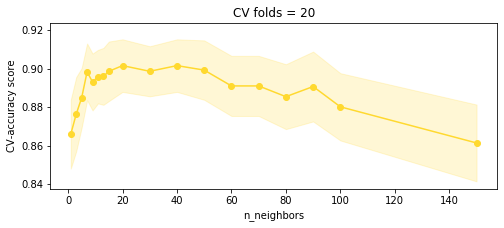

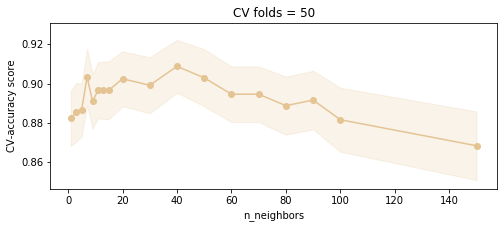

In [3]:
# KNN: n_neighbors - accuracy plot, different folds
ks = [1, 3, 5, 7, 9, 11, 13, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]
n_neighbors = {'n_neighbors': ks}
cv_folds = [2, 3, 5, 10, 20, 50]
colors = plt.cm.Set2

i = 1
for cv_fold in cv_folds:
    clf = GridSearchCV(KNeighborsClassifier(), n_neighbors, cv = cv_fold,
                       scoring = 'accuracy', iid = False, refit = False)
    clf.fit(X_train, y_train)
    scores = clf.cv_results_['mean_test_score']
    scores_se = clf.cv_results_['std_test_score']/np.sqrt(cv_fold)
    plt.figure().set_size_inches(8, 25)
    ax = plt.subplot(len(cv_folds)+1, 1, i)
    ax.scatter(ks, scores, color = colors(i))
    ax.plot(ks, scores, color = colors(i))
    ax.fill_between(ks, scores + scores_se, scores - scores_se, alpha=0.2, color = colors(i))
    ax.set_xlabel('n_neighbors')
    ax.set_ylabel('CV-accuracy score')
    ax.set_title('CV folds = %s' % cv_fold)
    i += 1
plt.show()

The best n_neighbors when CV folds are 2 is 13
The best n_neighbors when CV folds are 3 is 15
The best n_neighbors when CV folds are 5 is 20
The best n_neighbors when CV folds are 10 is 20
The best n_neighbors when CV folds are 20 is 20
The best n_neighbors when CV folds are 50 is 40


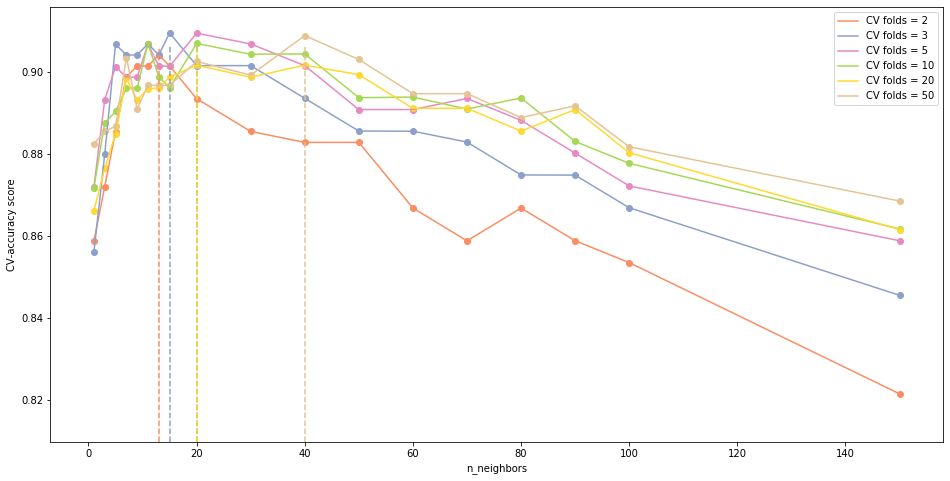

In [4]:
# KNN: n_neighbors - accuracy plot, different folds, finding the best parameters
ks = [1, 3, 5, 7, 9, 11, 13, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]
n_neighbors = {'n_neighbors': ks}
cv_folds = [2, 3, 5, 10, 20, 50]
colors = plt.cm.Set2

plt.figure().set_size_inches(16, 8)
plt.xlabel('n_neighbors')
plt.ylabel('CV-accuracy score')

i = 1
for cv_fold in cv_folds:
    clf = GridSearchCV(KNeighborsClassifier(), n_neighbors, cv = cv_fold,
                       scoring = 'accuracy', iid = False, refit = False)
    clf.fit(X_train, y_train)
    scores = clf.cv_results_['mean_test_score']
    best_score = clf.best_score_
    best_param = clf.best_params_['n_neighbors']
    print('The best n_neighbors when CV folds are %s is %s' % (cv_fold, best_param))
    plt.scatter(ks, scores, color = colors(i))
    plt.plot(ks, scores, color = colors(i), label = 'CV folds = %s' % cv_fold)
    plt.axvline(x = best_param, ymax = best_score, linestyle = '--', color = colors(i))
    i += 1
plt.legend(loc="best")
plt.show()

The best n_neighbors when the scoring parameter is precision_red is 3
The best n_neighbors when the scoring parameter is precision_blue is 20
The best n_neighbors when the scoring parameter is recall_red is 20
The best n_neighbors when the scoring parameter is recall_blue is 3
The best n_neighbors when the scoring parameter is f1 is 20
The best n_neighbors when the scoring parameter is accuracy is 20


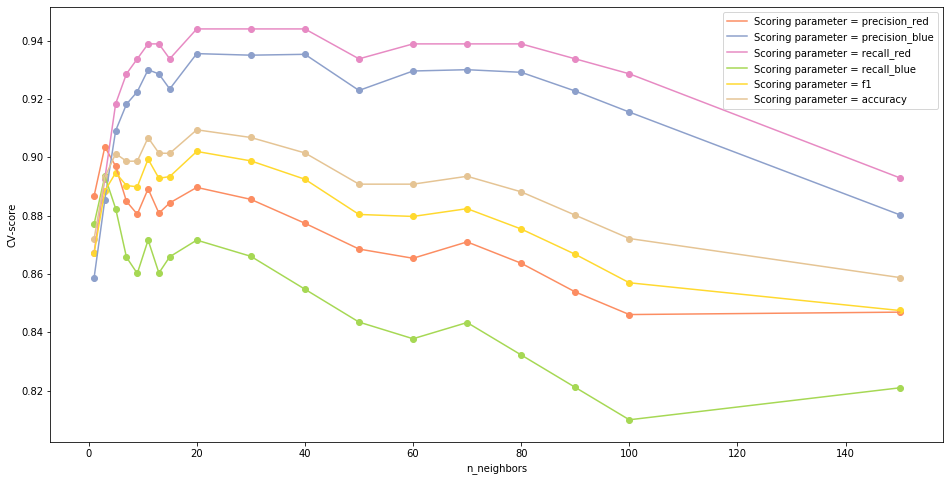

In [5]:
# KNN: n_neighbors - scores plot, fix the CV folds=5, using different scores to finding the best parameter
ks = [1, 3, 5, 7, 9, 11, 13, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]
n_neighbors = {'n_neighbors': ks}
scorings = {'precision_red': make_scorer(precision_score, pos_label=0),
            'precision_blue': make_scorer(precision_score, pos_label=1),
            'recall_red': make_scorer(recall_score, pos_label=0), 
            'recall_blue': make_scorer(recall_score, pos_label=1), 
            'f1': make_scorer(f1_score),
            'accuracy': make_scorer(accuracy_score)}
colors = plt.cm.Set2

plt.figure().set_size_inches(16, 8)
plt.xlabel('n_neighbors')
plt.ylabel('CV-score')

i = 1
for score in scorings:
    clf = GridSearchCV(KNeighborsClassifier(), n_neighbors, cv = 5,
                       scoring = scorings, iid = False, refit = score)
    clf.fit(X_train, y_train)
    scores = clf.cv_results_['mean_test_%s' % score]
    best_score = clf.best_score_
    best_param = clf.best_params_['n_neighbors']
    print('The best n_neighbors when the scoring parameter is %s is %s' % (score, best_param))
    plt.scatter(ks, scores, color = colors(i))
    plt.plot(ks, scores, color = colors(i), label = 'Scoring parameter = %s' % score)
    i += 1
plt.legend(loc="best")
plt.show()

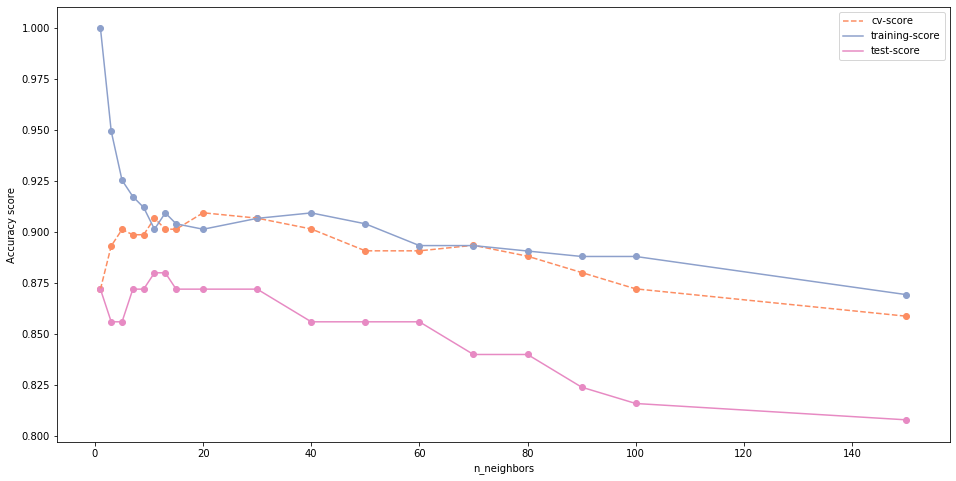

In [6]:
# CV score, test score, training score (using Accuracy, cv=5)
ks = [1, 3, 5, 7, 9, 11, 13, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]
n_neighbors = {'n_neighbors': ks}
plt.figure().set_size_inches(16, 8)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy score')

gcv = GridSearchCV(KNeighborsClassifier(), n_neighbors, cv = 5,
                   scoring = 'accuracy', iid = False, refit = False)
gcv.fit(X_train, y_train)
scores = gcv.cv_results_['mean_test_score']
plt.scatter(ks, scores, color = colors(1))
plt.plot(ks, scores, color = colors(1), linestyle = '--', label = 'cv-score')

scores_train = []
scores_test = []
for k in ks:
    clf = KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    scores_train.append(score_train)
    scores_test.append(score_test)

plt.scatter(ks, scores_train, color = colors(2))
plt.plot(ks, scores_train, color = colors(2), label = 'training-score')
plt.scatter(ks, scores_test, color = colors(3))
plt.plot(ks, scores_test, color = colors(3), label = 'test-score')
        
plt.legend(loc="best")
plt.show()

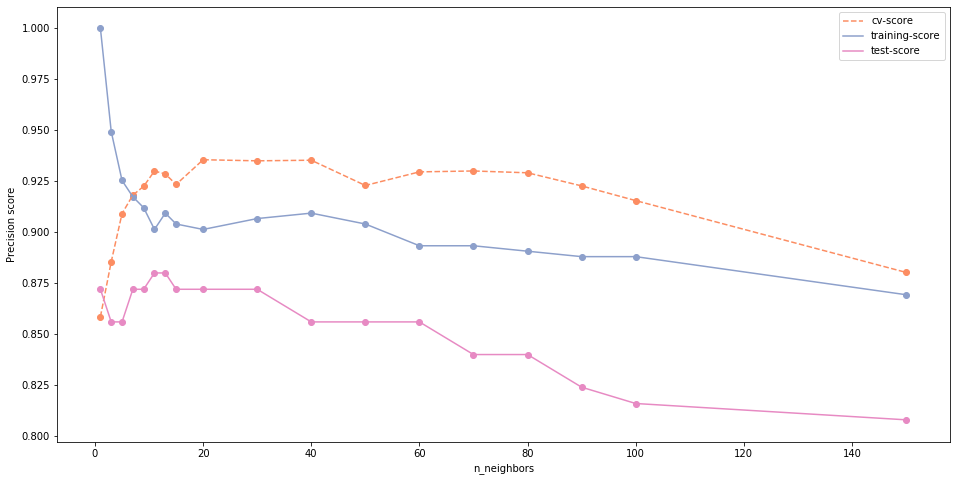

In [7]:
# CV score, test score, training score (using Precision, cv=5)
ks = [1, 3, 5, 7, 9, 11, 13, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]
n_neighbors = {'n_neighbors': ks}
plt.figure().set_size_inches(16, 8)
plt.xlabel('n_neighbors')
plt.ylabel('Precision score')

gcv = GridSearchCV(KNeighborsClassifier(), n_neighbors, cv = 5,
                   scoring = 'precision', iid = False, refit = False)
gcv.fit(X_train, y_train)
scores = gcv.cv_results_['mean_test_score']
plt.scatter(ks, scores, color = colors(1))
plt.plot(ks, scores, color = colors(1), linestyle = '--', label = 'cv-score')

scores_train = []
scores_test = []
for k in ks:
    clf = KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    scores_train.append(score_train)
    scores_test.append(score_test)

plt.scatter(ks, scores_train, color = colors(2))
plt.plot(ks, scores_train, color = colors(2), label = 'training-score')
plt.scatter(ks, scores_test, color = colors(3))
plt.plot(ks, scores_test, color = colors(3), label = 'test-score')
        
plt.legend(loc="best")
plt.show()

In [8]:
# check several models
## use GridSearchCV
ks = [1, 3, 5, 7, 9, 11, 13, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]
n_neighbors = {'n_neighbors': ks}

clf = GridSearchCV(KNeighborsClassifier(), n_neighbors, scoring='accuracy',
                   cv=5, iid = False)
clf.fit(X_train, y_train)

print("The best parameters based on accuracy is:", clf.best_params_) 
result = pd.DataFrame(clf.cv_results_)
result = result.sort_values(by='mean_test_score', ascending=False)
result[['mean_test_score', 'param_n_neighbors']].round(3)


The best parameters based on accuracy is: {'n_neighbors': 20}


,mean_test_score,param_n_neighbors
8,0.909,20
9,0.907,30
5,0.907,11
10,0.901,40
6,0.901,13
7,0.901,15
2,0.901,5
4,0.899,9
3,0.899,7
13,0.893,70


In [9]:
# check several models
## use cross_val_score
ks = [1, 3, 5, 7, 9, 11, 13, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]
n_neighbors = {'n_neighbors': ks}

for k in ks:
    clf = KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    cv_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Mean CV accuracy score when k=%s: %0.3f" % (k, cv_score.mean()))

Mean CV accuracy score when k=1: 0.872
Mean CV accuracy score when k=3: 0.893
Mean CV accuracy score when k=5: 0.901
Mean CV accuracy score when k=7: 0.899
Mean CV accuracy score when k=9: 0.899
Mean CV accuracy score when k=11: 0.907
Mean CV accuracy score when k=13: 0.901
Mean CV accuracy score when k=15: 0.901
Mean CV accuracy score when k=20: 0.909
Mean CV accuracy score when k=30: 0.907
Mean CV accuracy score when k=40: 0.901
Mean CV accuracy score when k=50: 0.891
Mean CV accuracy score when k=60: 0.891
Mean CV accuracy score when k=70: 0.893
Mean CV accuracy score when k=80: 0.888
Mean CV accuracy score when k=90: 0.880
Mean CV accuracy score when k=100: 0.872
Mean CV accuracy score when k=150: 0.859


Confusion matrix based on testing data when n_neighbors = 3:
    0   1
0  47   7
1  11  60
Classification report based on testing when n_neighbors = 3:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        54
           1       0.90      0.85      0.87        71

    accuracy                           0.86       125
   macro avg       0.85      0.86      0.85       125
weighted avg       0.86      0.86      0.86       125



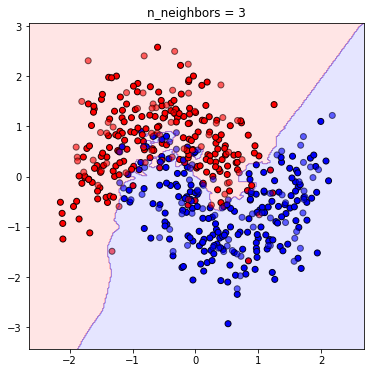

Confusion matrix based on testing data when n_neighbors = 20:
    0   1
0  51   3
1  13  58
Classification report based on testing when n_neighbors = 20:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        54
           1       0.95      0.82      0.88        71

    accuracy                           0.87       125
   macro avg       0.87      0.88      0.87       125
weighted avg       0.88      0.87      0.87       125



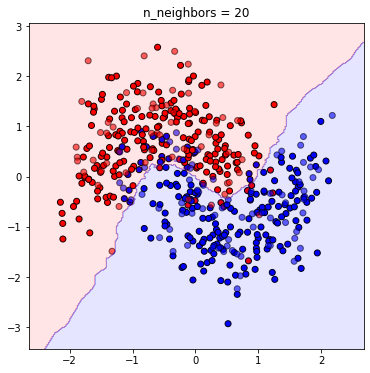

Confusion matrix based on testing data when n_neighbors = 40:
    0   1
0  49   5
1  13  58
Classification report based on testing when n_neighbors = 40:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84        54
           1       0.92      0.82      0.87        71

    accuracy                           0.86       125
   macro avg       0.86      0.86      0.86       125
weighted avg       0.86      0.86      0.86       125



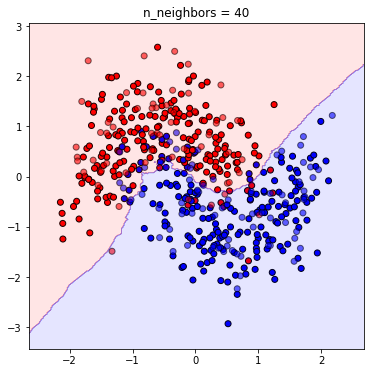

Confusion matrix based on testing data when n_neighbors = 80:
    0   1
0  49   5
1  15  56
Classification report based on testing when n_neighbors = 80:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        54
           1       0.92      0.79      0.85        71

    accuracy                           0.84       125
   macro avg       0.84      0.85      0.84       125
weighted avg       0.85      0.84      0.84       125



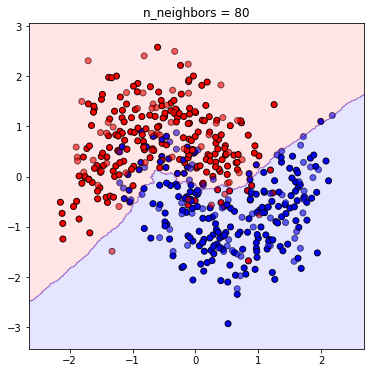

Confusion matrix based on testing data when n_neighbors = 150:
    0   1
0  46   8
1  16  55
Classification report based on testing when n_neighbors = 150:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        54
           1       0.87      0.77      0.82        71

    accuracy                           0.81       125
   macro avg       0.81      0.81      0.81       125
weighted avg       0.82      0.81      0.81       125



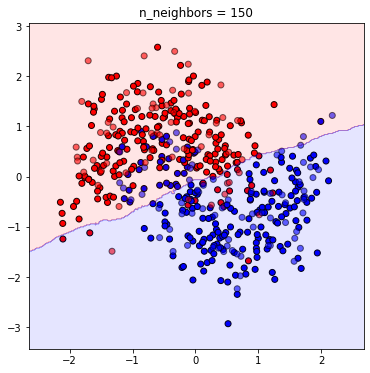

In [10]:
# check several models: external validation, plot

ks = [3, 20, 40, 80, 150]
n_neighbors = {'n_neighbors': ks}

h = .02
i = 1
for k in ks:
    clf = KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    
    y_true, y_pred = y_test, clf.predict(X_test)
    print("Confusion matrix based on testing data when n_neighbors = %s:" % k)
    print(pd.DataFrame(confusion_matrix(y_true, y_pred))) 
    print("Classification report based on testing when n_neighbors = %s:" % k)
    print(classification_report(y_true, y_pred))
    
    plt.figure().set_size_inches(6, 6)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, edgecolors='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, edgecolors='k', alpha=0.6)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.1)
    plt.title('n_neighbors = %s' % k)
    plt.show()

In [11]:
# use GridSearchCV to find the "best" parameters for SVM, based on accuracy
tuned_parameters = [{'kernel': [ 'linear','rbf'], 'gamma': [0.01, 0.1, 1, 10, 100],
                             'C': [0.1, 1, 5, 10, 50, 100]}]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='accuracy',
                   cv=5, iid = False)
clf.fit(X_train, y_train)

print("The best parameters based on accuracy is:", clf.best_params_) 
result = pd.DataFrame(clf.cv_results_)
result = result.sort_values(by='mean_test_score', ascending=False)
result[['mean_test_score', 'param_C', 'param_gamma', 'param_kernel']].round(3)


The best parameters based on accuracy is: {'C': 5, 'gamma': 1, 'kernel': 'rbf'}


,mean_test_score,param_C,param_gamma,param_kernel
25,0.909,5,1,rbf
35,0.907,10,1,rbf
55,0.907,100,1,rbf
17,0.907,1,10,rbf
45,0.904,50,1,rbf
5,0.899,0.1,1,rbf
15,0.899,1,1,rbf
33,0.896,10,0.1,rbf
53,0.896,100,0.1,rbf
43,0.893,50,0.1,rbf


In [12]:
# use GridSearchCV to find the "best" parameters for DT, based on accuracy
max_depth = {'max_depth': [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 16, 20, 30]}

clf = GridSearchCV(DecisionTreeClassifier(), max_depth, scoring='accuracy',
                   cv=5, iid = False)
clf.fit(X_train, y_train)

print("The best parameters based on accuracy is:", clf.best_params_) 
result = pd.DataFrame(clf.cv_results_)
result = result.sort_values(by='mean_test_score', ascending=False)
result[['mean_test_score', 'param_max_depth']].round(3)

The best parameters based on accuracy is: {'max_depth': 4}


,mean_test_score,param_max_depth
3,0.893,4
1,0.891,2
2,0.891,3
5,0.880,7
4,0.880,5
6,0.875,8
11,0.869,16
7,0.867,9
13,0.867,30
9,0.864,12


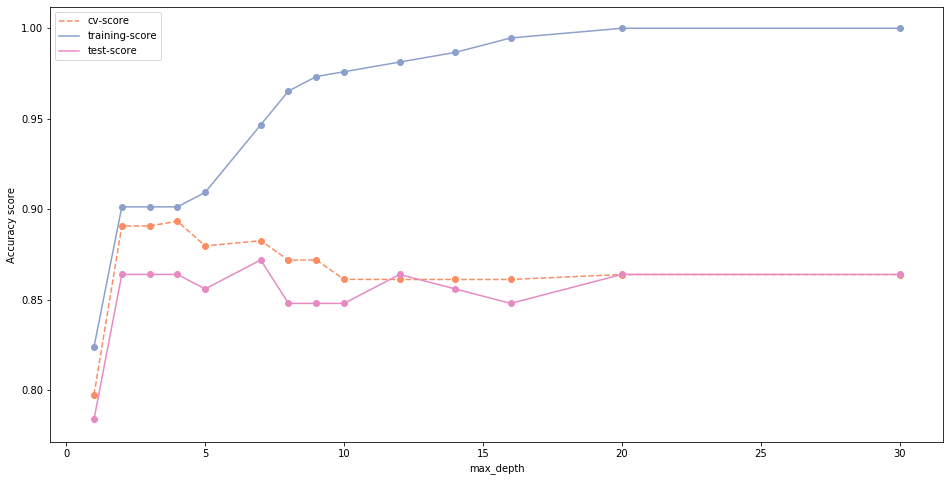

In [13]:
# CV score, test score, training score for DT (using Accuracy, cv=5)
ds = [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 16, 20, 30]
max_depth = {'max_depth': ds}
plt.figure().set_size_inches(16, 8)
plt.xlabel('max_depth')
plt.ylabel('Accuracy score')

gcv = GridSearchCV(DecisionTreeClassifier(), max_depth, cv = 5,
                   scoring = 'accuracy', iid = False, refit = False)
gcv.fit(X_train, y_train)
scores = gcv.cv_results_['mean_test_score']
plt.scatter(ds, scores, color = colors(1))
plt.plot(ds, scores, color = colors(1), linestyle = '--', label = 'cv-score')

scores_train = []
scores_test = []
for d in ds:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    scores_train.append(score_train)
    scores_test.append(score_test)

plt.scatter(ds, scores_train, color = colors(2))
plt.plot(ds, scores_train, color = colors(2), label = 'training-score')
plt.scatter(ds, scores_test, color = colors(3))
plt.plot(ds, scores_test, color = colors(3), label = 'test-score')
        
plt.legend(loc="best")
plt.show()

In [14]:
# make several models based on the above results, and use cross_val_score to select

model_knn_20 = KNeighborsClassifier(20)
model_knn_20.fit(X_train, y_train)
model_knn_40 = KNeighborsClassifier(40)
model_knn_40.fit(X_train, y_train)
model_svm_lin = SVC(C=1, gamma=1, kernel='linear')
model_svm_lin.fit(X_train, y_train)
model_svm_rbf = SVC(C=5, gamma=1, kernel='rbf')
model_svm_rbf.fit(X_train, y_train)
model_dt_2 = DecisionTreeClassifier(max_depth=2)
model_dt_2.fit(X_train, y_train)
model_dt_4 = DecisionTreeClassifier(max_depth=4)
model_dt_4.fit(X_train, y_train)

models = [model_knn_20, model_knn_40, model_svm_lin, model_svm_rbf, model_dt_2, model_dt_4]
model_names = ['model_knn_20', 'model_knn_40', 'model_svm_lin', 'model_svm_rbf', 
               'model_dt_2', 'model_dt_4']

for model, model_name in zip(models, model_names):
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print("Mean CV accuracy score for %r is: %0.3f" % (model_name, cv_score.mean()))
    

Mean CV accuracy score for 'model_knn_20' is: 0.909
Mean CV accuracy score for 'model_knn_40' is: 0.901
Mean CV accuracy score for 'model_svm_lin' is: 0.867
Mean CV accuracy score for 'model_svm_rbf' is: 0.909
Mean CV accuracy score for 'model_dt_2' is: 0.891
Mean CV accuracy score for 'model_dt_4' is: 0.893


Confusion matrix based on testing data for 'model_knn_20':
    0   1
0  51   3
1  13  58
Classification report based on testing data for 'model_knn_20':
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        54
           1       0.95      0.82      0.88        71

    accuracy                           0.87       125
   macro avg       0.87      0.88      0.87       125
weighted avg       0.88      0.87      0.87       125



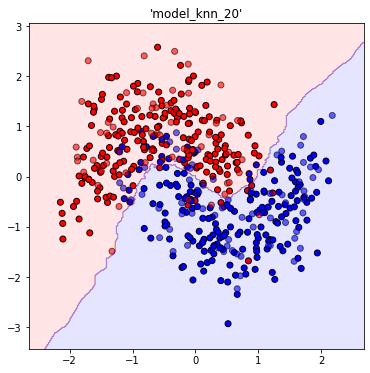

Confusion matrix based on testing data for 'model_knn_40':
    0   1
0  49   5
1  13  58
Classification report based on testing data for 'model_knn_40':
              precision    recall  f1-score   support

           0       0.79      0.91      0.84        54
           1       0.92      0.82      0.87        71

    accuracy                           0.86       125
   macro avg       0.86      0.86      0.86       125
weighted avg       0.86      0.86      0.86       125



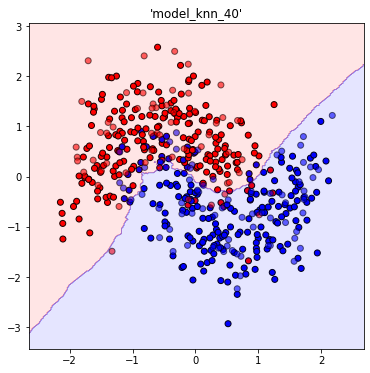

Confusion matrix based on testing data for 'model_svm_lin':
    0   1
0  46   8
1  15  56
Classification report based on testing data for 'model_svm_lin':
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        54
           1       0.88      0.79      0.83        71

    accuracy                           0.82       125
   macro avg       0.81      0.82      0.81       125
weighted avg       0.82      0.82      0.82       125



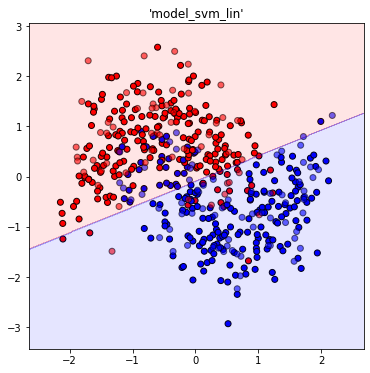

Confusion matrix based on testing data for 'model_svm_rbf':
    0   1
0  48   6
1  10  61
Classification report based on testing data for 'model_svm_rbf':
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        54
           1       0.91      0.86      0.88        71

    accuracy                           0.87       125
   macro avg       0.87      0.87      0.87       125
weighted avg       0.87      0.87      0.87       125



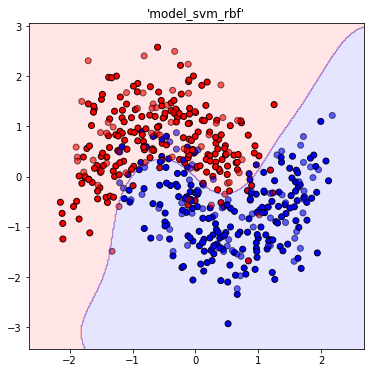

Confusion matrix based on testing data for 'model_dt_2':
    0   1
0  47   7
1  10  61
Classification report based on testing data for 'model_dt_2':
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        54
           1       0.90      0.86      0.88        71

    accuracy                           0.86       125
   macro avg       0.86      0.86      0.86       125
weighted avg       0.87      0.86      0.86       125



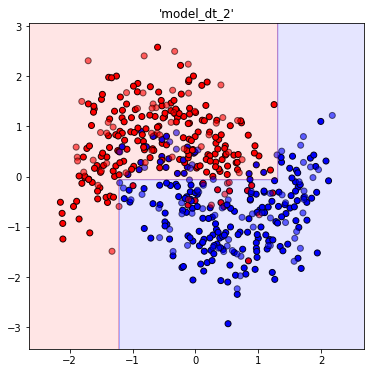

Confusion matrix based on testing data for 'model_dt_4':
    0   1
0  47   7
1  10  61
Classification report based on testing data for 'model_dt_4':
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        54
           1       0.90      0.86      0.88        71

    accuracy                           0.86       125
   macro avg       0.86      0.86      0.86       125
weighted avg       0.87      0.86      0.86       125



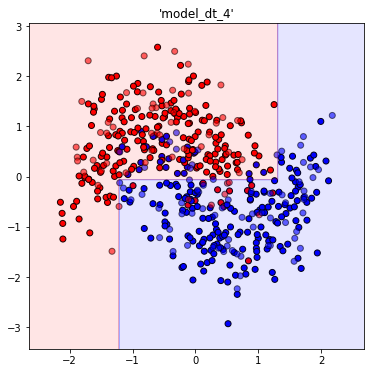

In [15]:
# check several models: external validation, plot

h = .02
i = 1
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_true, y_pred = y_test, model.predict(X_test)
    print("Confusion matrix based on testing data for %r:" % model_name)
    print(pd.DataFrame(confusion_matrix(y_true, y_pred))) 
    print("Classification report based on testing data for %r:" % model_name)
    print(classification_report(y_true, y_pred))
    
    plt.figure().set_size_inches(6, 6)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, edgecolors='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, edgecolors='k', alpha=0.6)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.1)
    plt.title('%r' % model_name)
    plt.show()